Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
df = pd.read_csv('stud.csv')

In [4]:
# check the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Shape
df.shape

(1000, 8)

In [6]:
# check for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

We observe no missing values

In [7]:
#Check for duplicate values
df.duplicated().sum()

0

There are no duplicate values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We observe 'gender','race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course' have categorical variables whereas 'math_score', 'reading_score' and 'writing_score' are quantitative.

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* We see for the quantitative data that all mean and standard deviation values are close to each other
* min score values for math, reading and writing are 0, 17 and 10 respectively

In [11]:
print("Categories in 'gender' variable:",end=" ")
print(df["gender"].unique())
print("Categories in 'race or ethnicity' variable:",end=" ")
print(df["race_ethnicity"].unique())
print("Categories in 'parental level of education' variable:",end=" ")
print(df["parental_level_of_education"].unique())
print("Categories in 'lunch' variable:",end=" ")
print(df["lunch"].unique())
print("Categories in 'test preparation course' variable:",end=" ")
print(df["test_preparation_course"].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race or ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


Print the total number of numeric features and categorical features


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='object']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='object']

print("We have {} Numerical Features: {}".format(len(numeric_features),numeric_features))
print("We have {} Categorical Features: {}".format(len(categorical_features),categorical_features))

We have 3 Numerical Features: ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding columns for total Score and Average

In [13]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df["reading_score"]==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print('Number of students with full marks in Maths:{}'.format(math_full))
print(f'Number of students with full marks in Reading:{reading_full}') # different way of writing the above line
print(f'Number of students with full makrs in Writing:{writing_full}') 

Number of students with full marks in Maths:7
Number of students with full marks in Reading:17
Number of students with full makrs in Writing:14


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


From values we evaluate that the students performed worst in maths whereas best in reading 

Visualize the average scores across different subjects

<Axes: xlabel='average', ylabel='Count'>

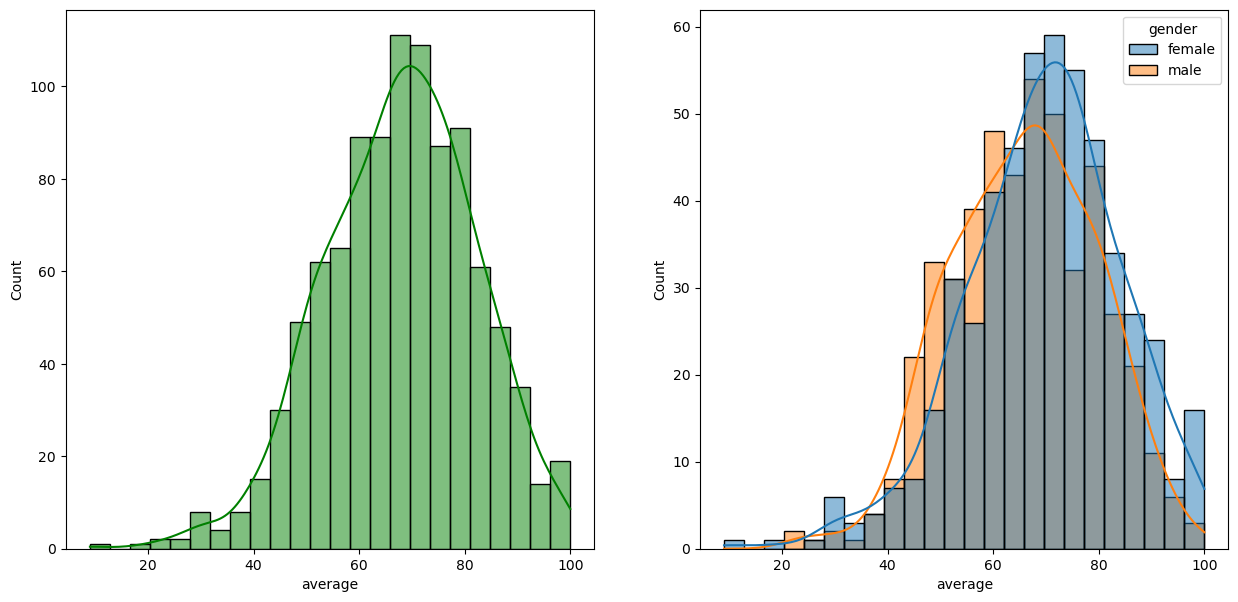

In [17]:
figs,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde='true',hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

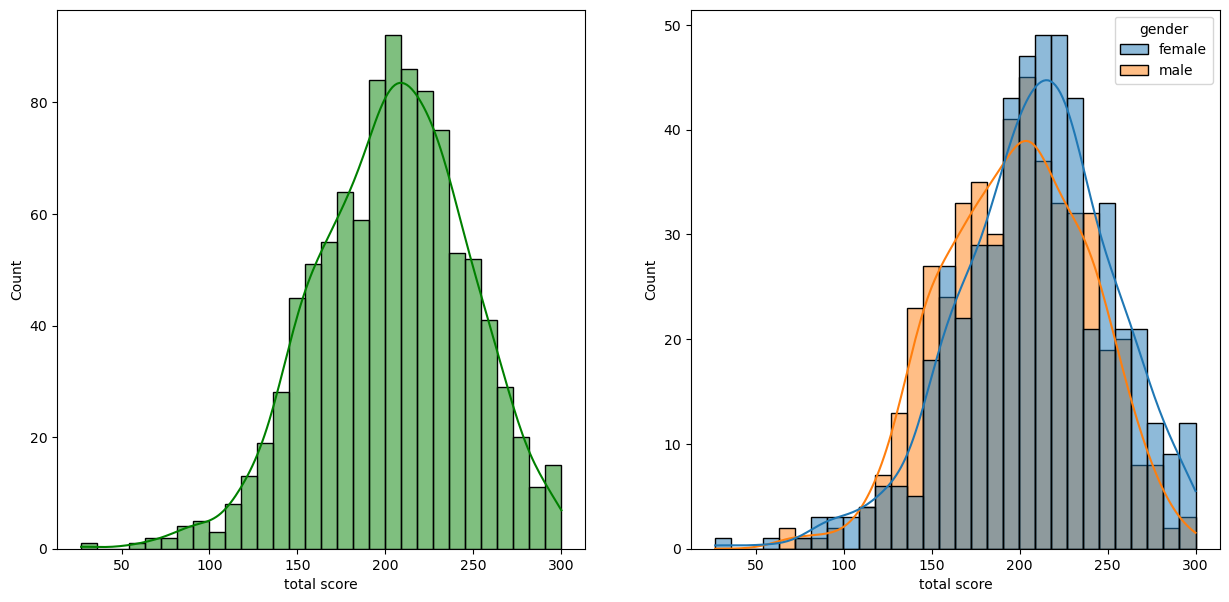

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,kde=True,hue='gender')

Females perform better as compared to men

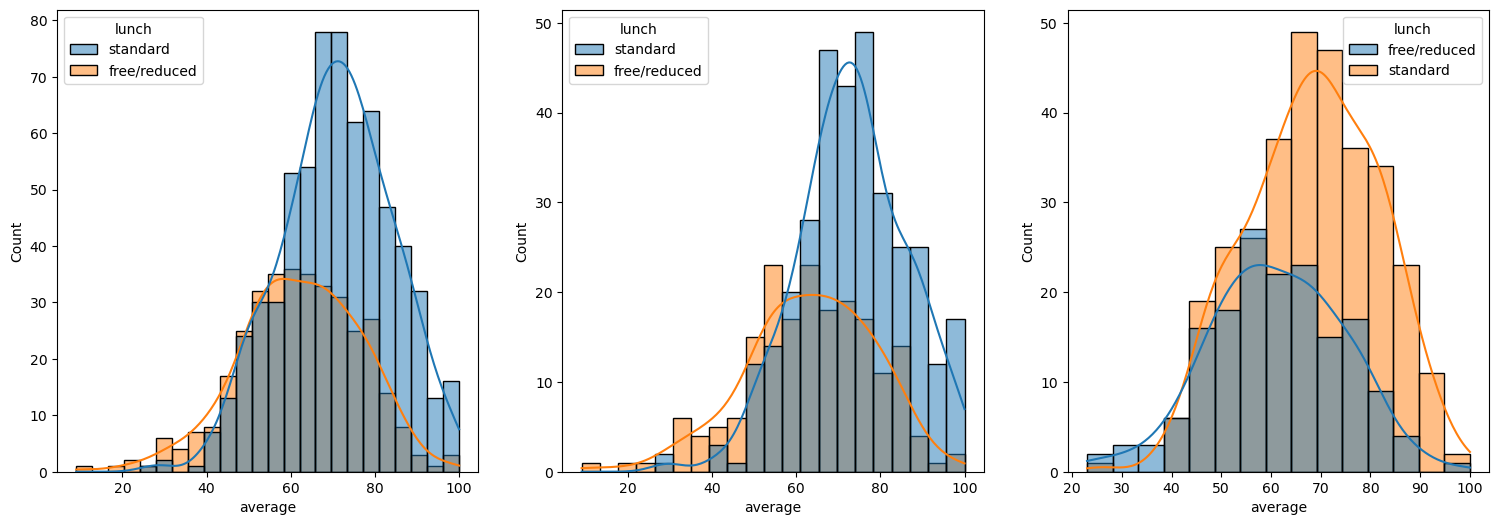

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde= True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

* Students having standard lunch perform better, irrespective of gender.

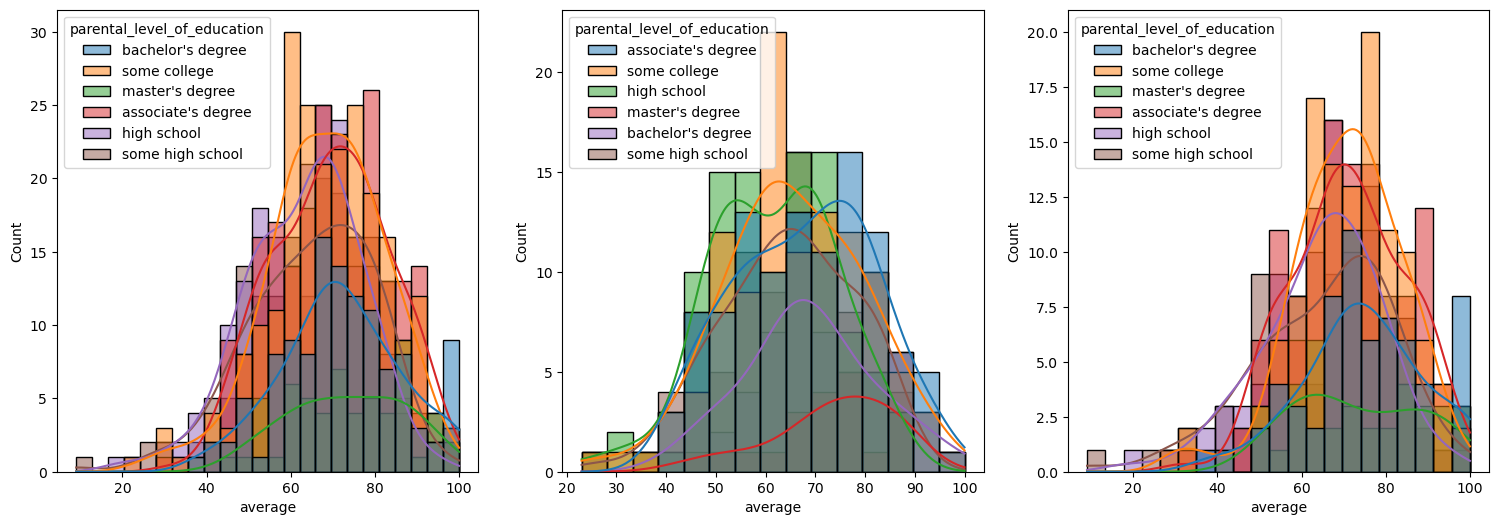

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights 
* In general, parents education does not help students perform better in examinations.
* 2nd Plot - Male students whose parents have associate or master's degree tend to perform better.
* 3rd Plot - there is no effect of parent's education on female students.

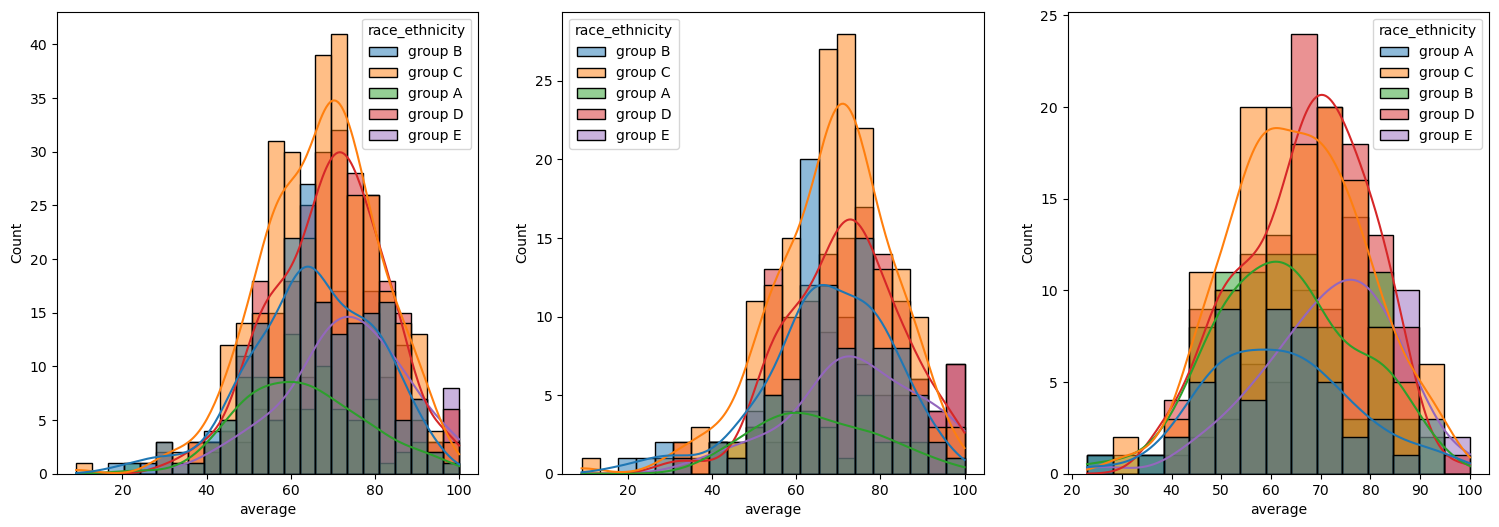

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [ ]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(1)

* Students who belong to Group A or Group tend to perform poorly in exam irrespective of their gender.

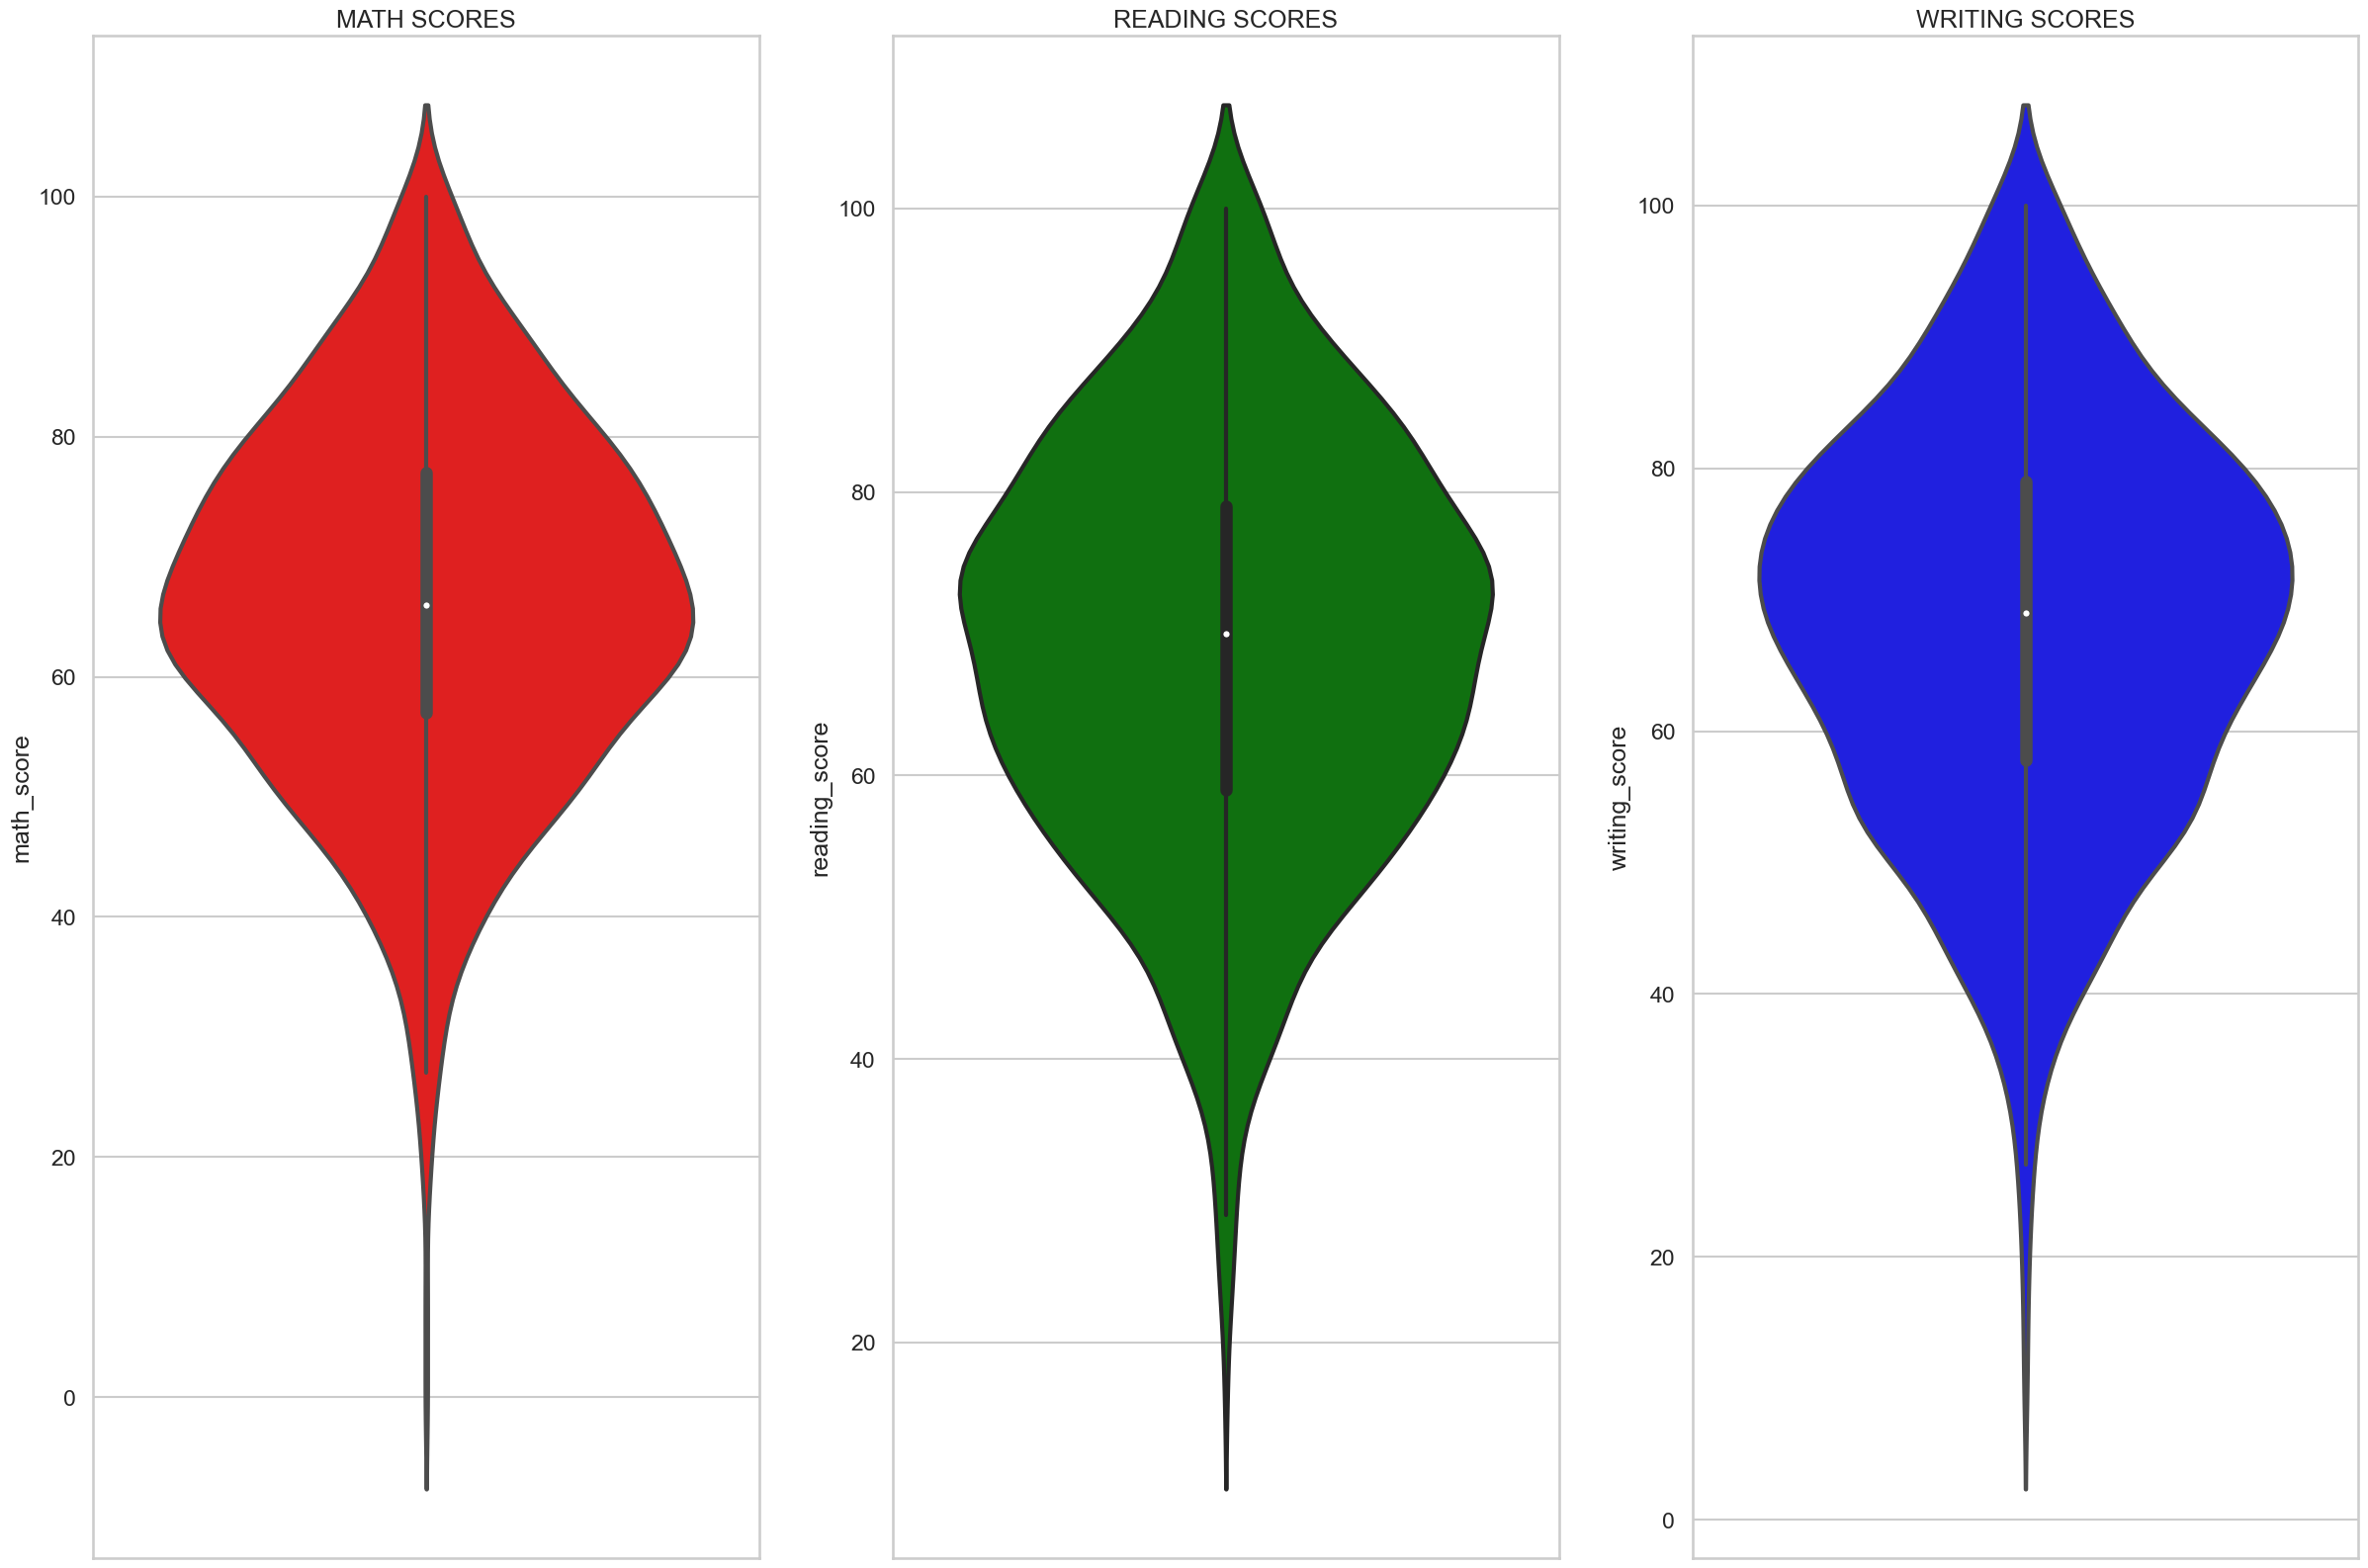

In [ ]:
# Maximum score of students in each subject.
plt.figure(figsize=(40,20))
sns.set_style("whitegrid")
sns.set_context("talk")
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

* For maths score, most students score from 60-80 with a median close to 65
* For Writing and Reading, most students score from 60-80 with a median close to 70

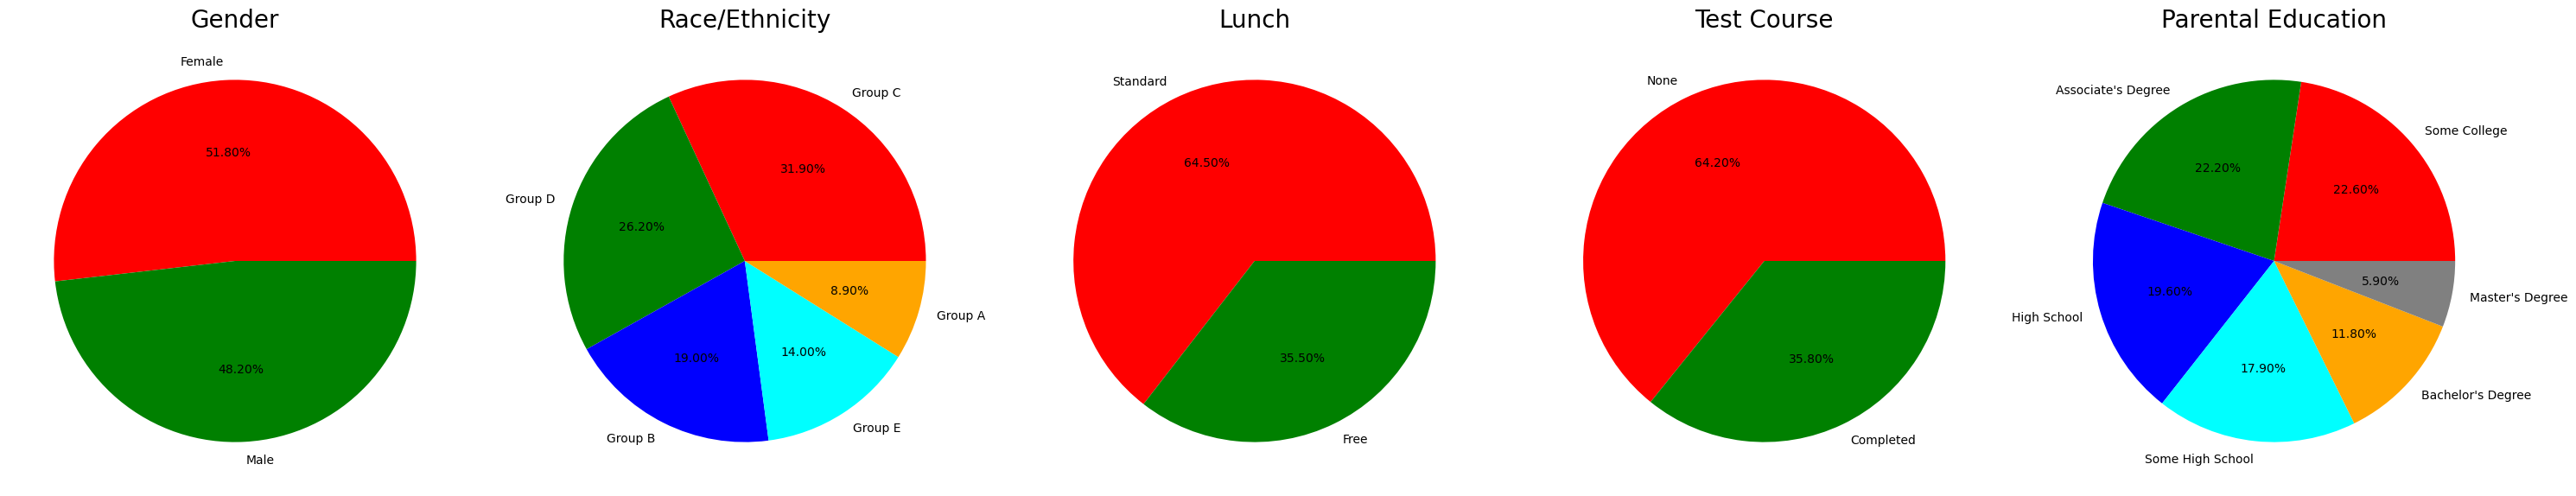

In [22]:
# Multivariate analysis 

plt.rcParams['figure.figsize'] = (30,20)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels= 'Female','Male'
color = ['red','green']

plt.pie(size,colors= color,labels = labels, autopct = '%.2f%%')
plt.title("Gender",fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels =['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%.2f%%')
plt.title("Race/Ethnicity",fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Gender Column
* What is the distribution of gender?
* Does gender have any impact on the student's performance

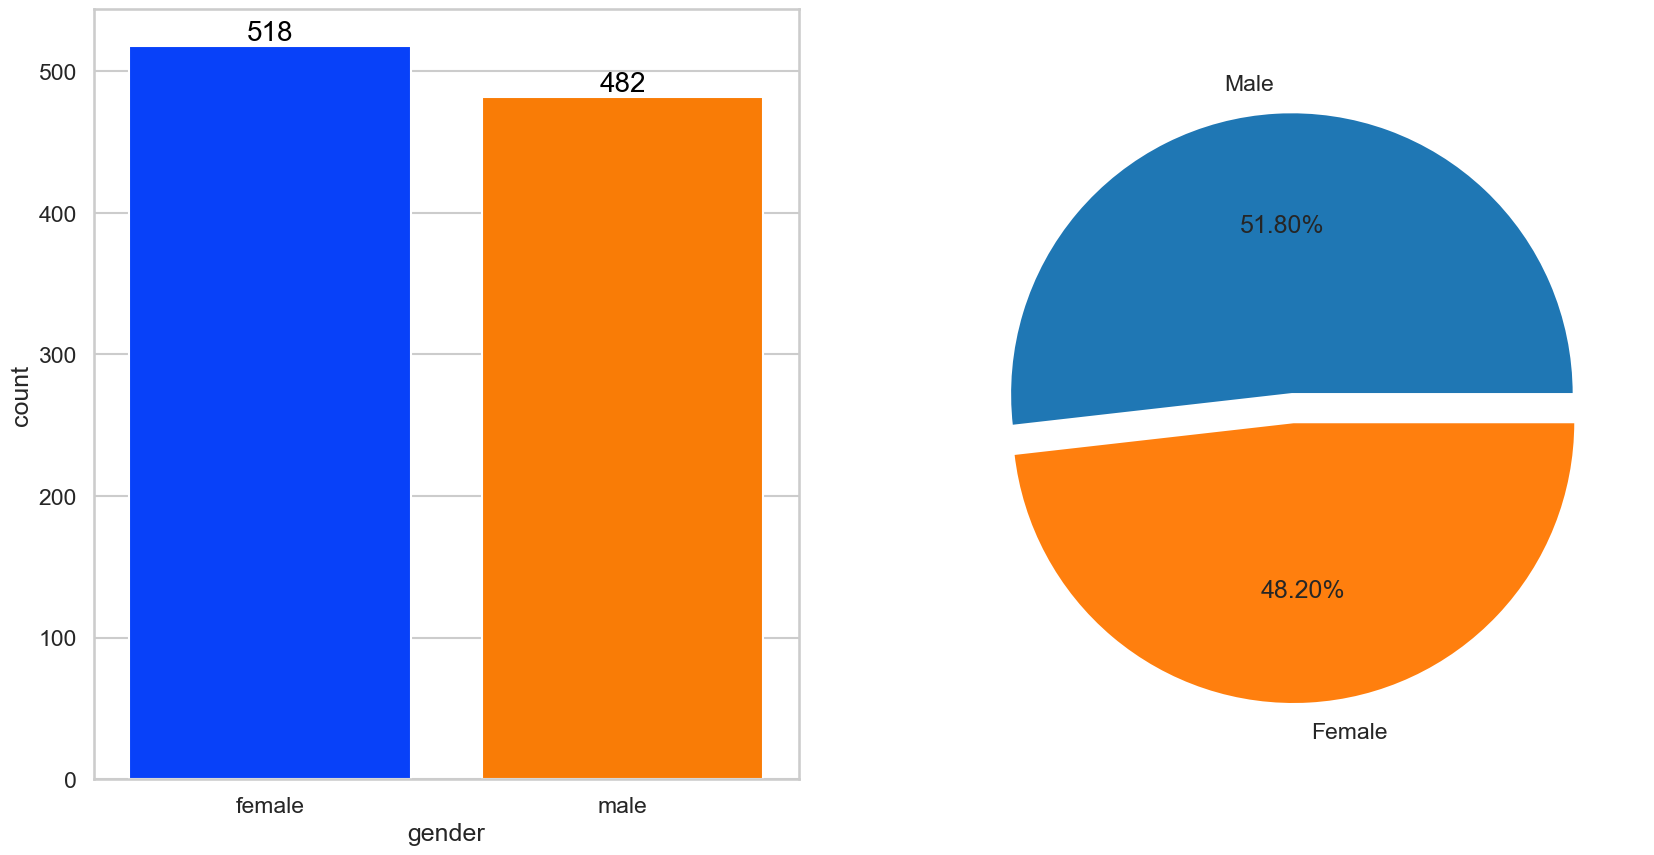

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df.gender,data=df,palette = 'bright',ax=ax[0],saturation= 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df.gender.value_counts(),data=df,labels=['Male','Female'],explode = [0,0.1],autopct='%.2f%%')
plt.show()

* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


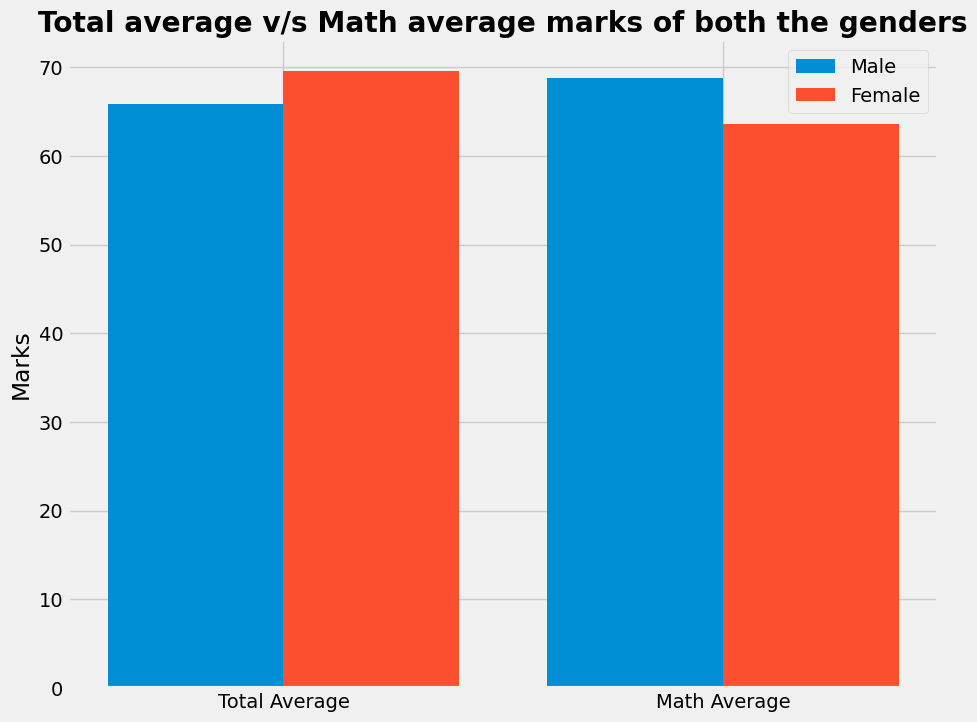

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

gender_group=numeric_columns.groupby(df["gender"]).mean()

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

* On an average females have a better overall score than men whereas males have scored higher in Maths.

Univariate Analysis for Race/ethnicity

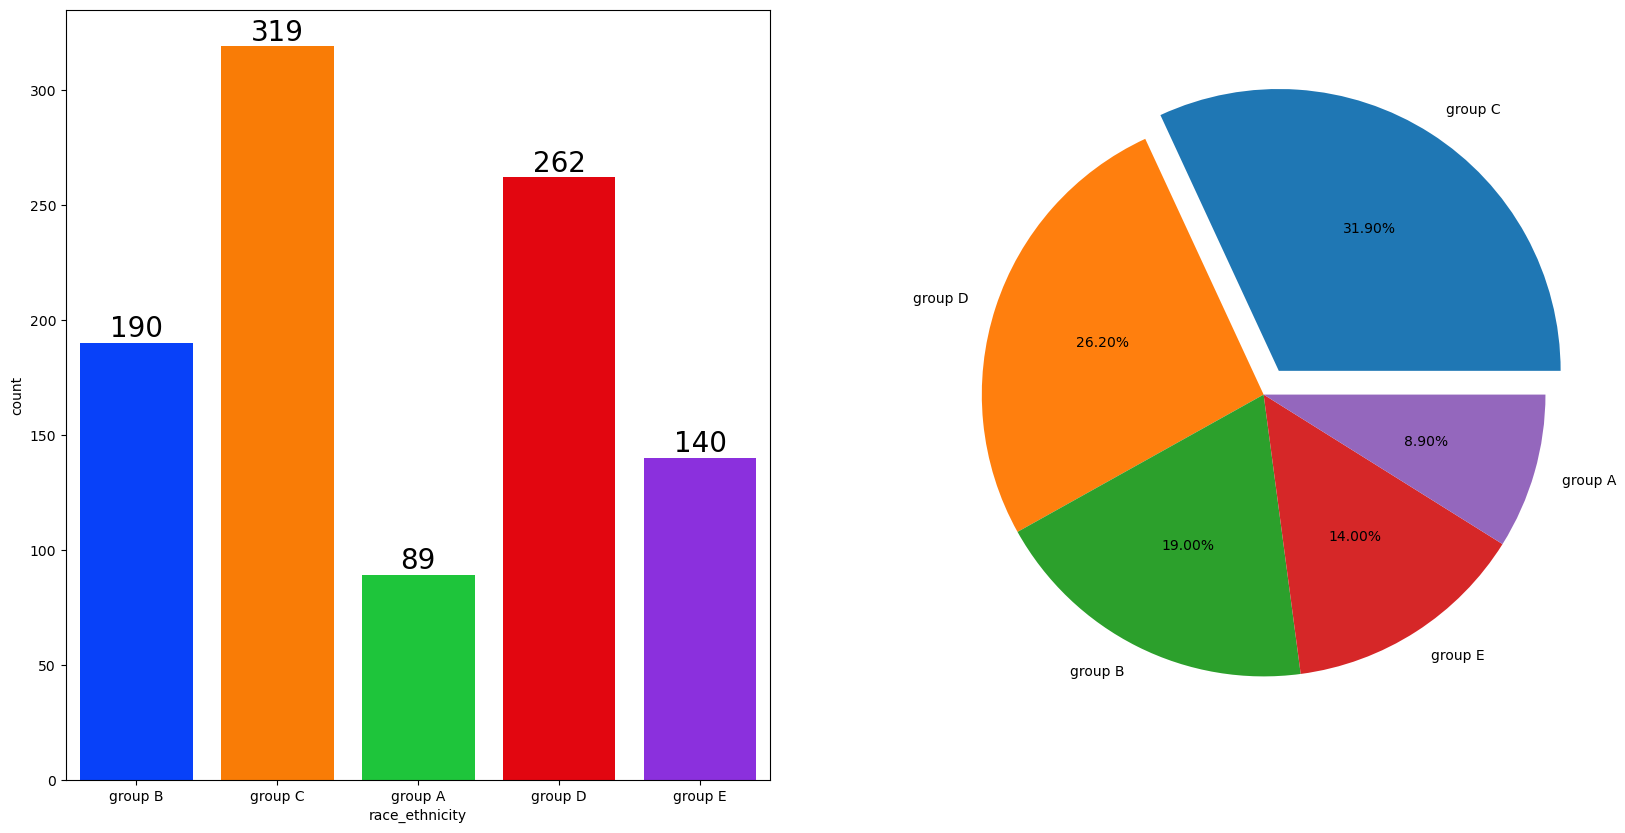

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%.2f%%')

plt.show()   

* Maximum students belong to Group C in the Dataset
* Lowest number of students belong to Group A

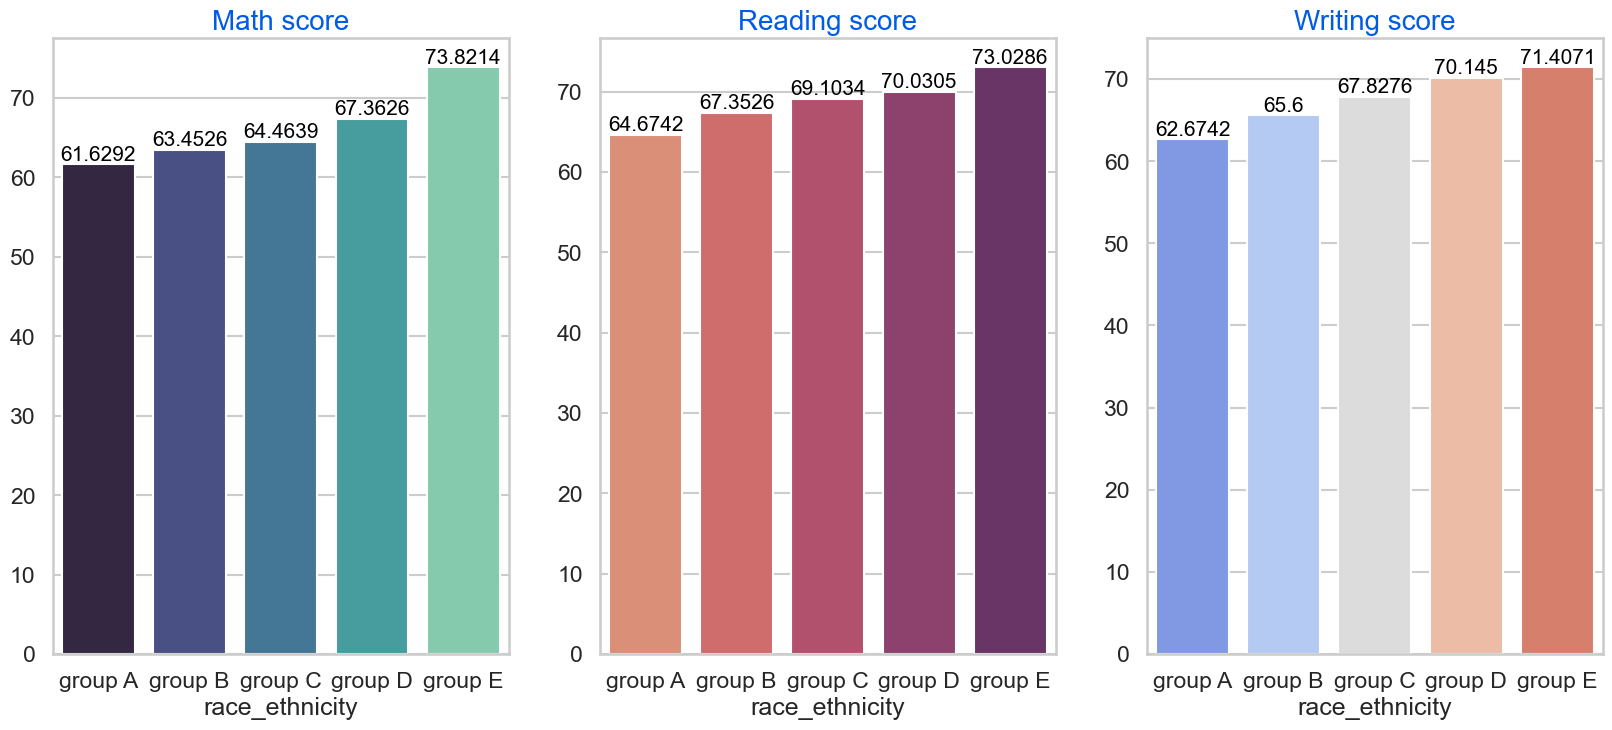

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Parental Level of Education Column
* What is the educational background of each Student's parent?
* Does parental education have any impact student's performance?

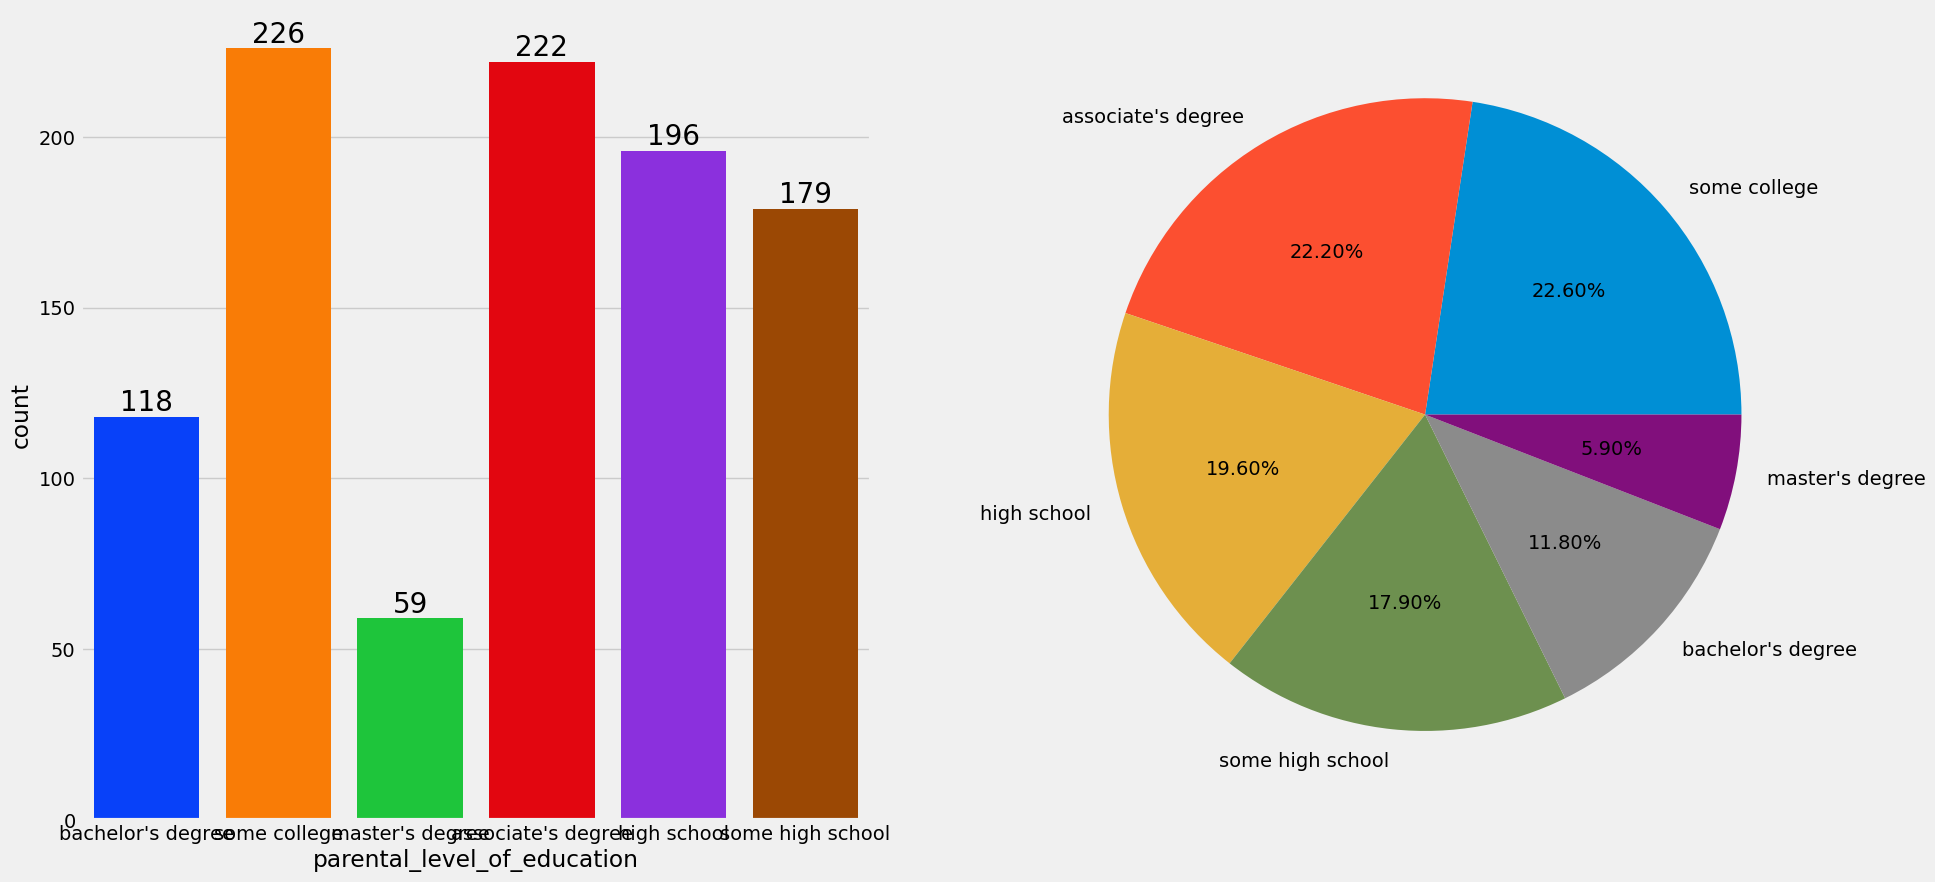

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].value_counts().index,autopct='%.2f%%')

plt.show()   

* Largest number of parents are from some college.

     math_score  reading_score  writing_score  total score    average
0            72             72             74          218  72.666667
1            69             90             88          247  82.333333
2            90             95             93          278  92.666667
3            47             57             44          148  49.333333
4            76             78             75          229  76.333333
..          ...            ...            ...          ...        ...
995          88             99             95          282  94.000000
996          62             55             55          172  57.333333
997          59             71             65          195  65.000000
998          68             78             77          223  74.333333
999          77             86             86          249  83.000000

[1000 rows x 5 columns]


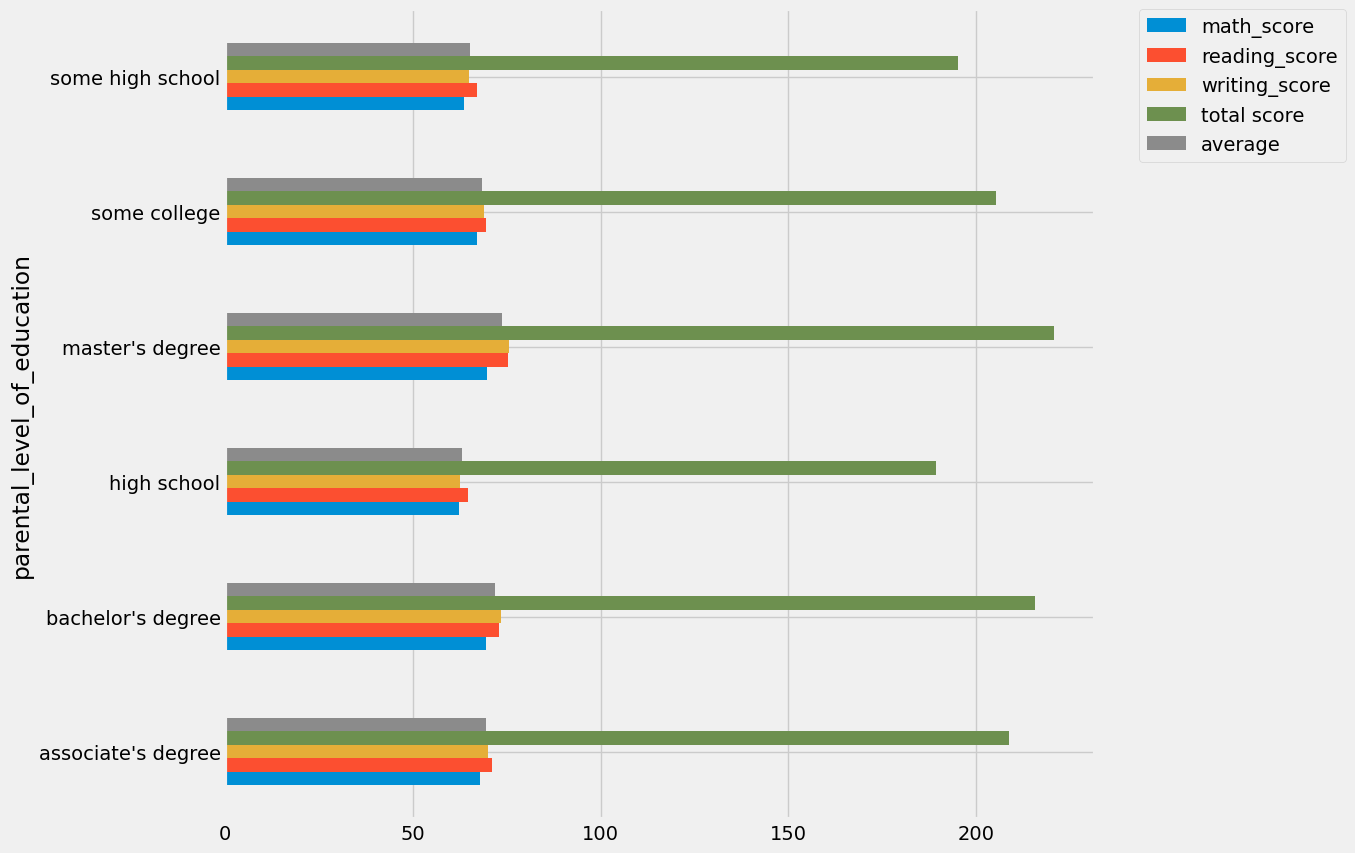

In [ ]:
# Group by 'parental_level_of_education' and aggregate mean for numeric columns
grouped_mean = numeric_columns.groupby(df['parental_level_of_education']).mean()

# Plot the aggregated mean
grouped_mean.plot(kind='barh', figsize=(10, 10))

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


The score of student whose parents possess master and bachelor level education are higher than others.

Univariate Analysis for Lunch

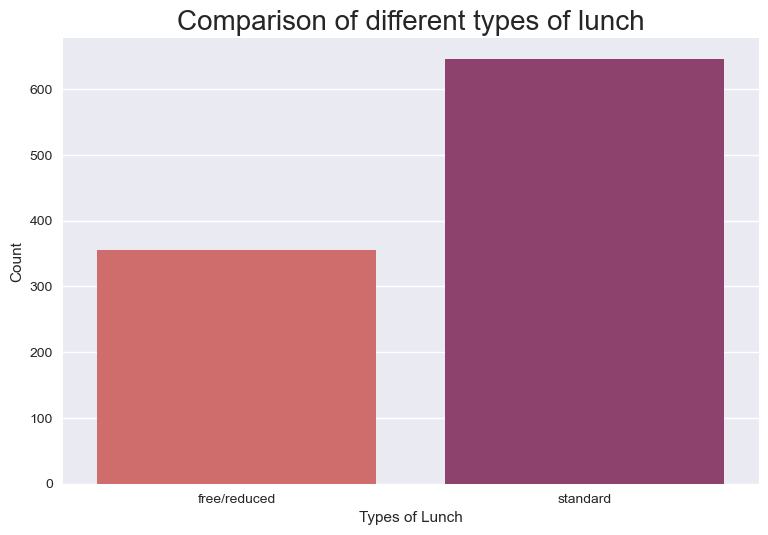

In [ ]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn')
sns.countplot(x='lunch',data=df,palette='flare')
plt.title('Comparison of different types of lunch',fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel("Count")
plt.show()

Students having standard lunch were more in number as compared to students having lunch at a free/reduced price. 

Bivariate Analysis

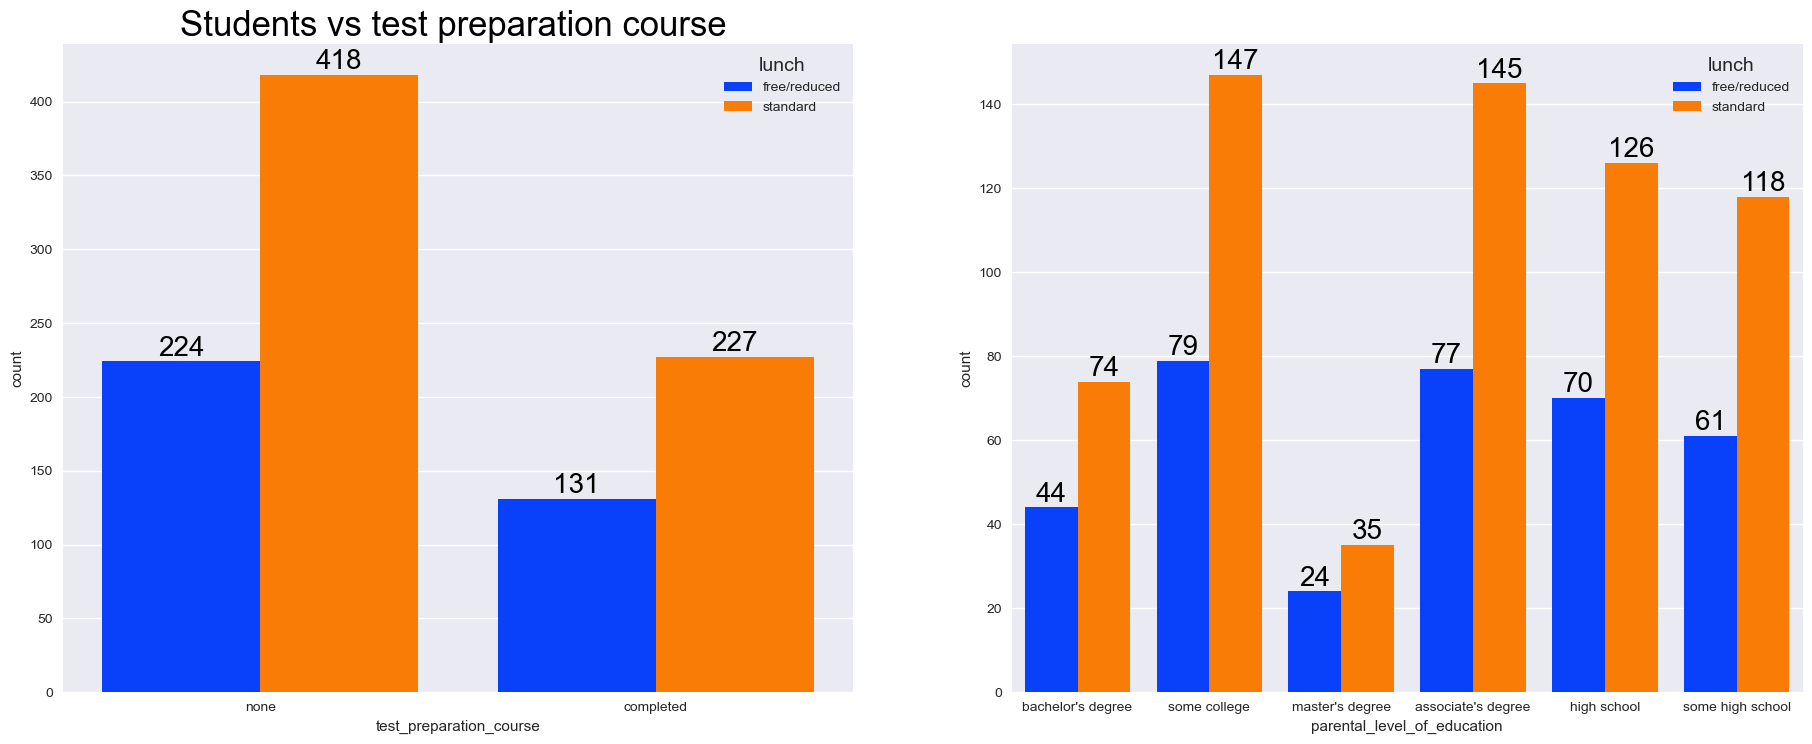

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['test_preparation_course'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


More number of students eat the standard lunch irrespective of parental education or test preparation

<Axes: xlabel='lunch', ylabel='writing_score'>

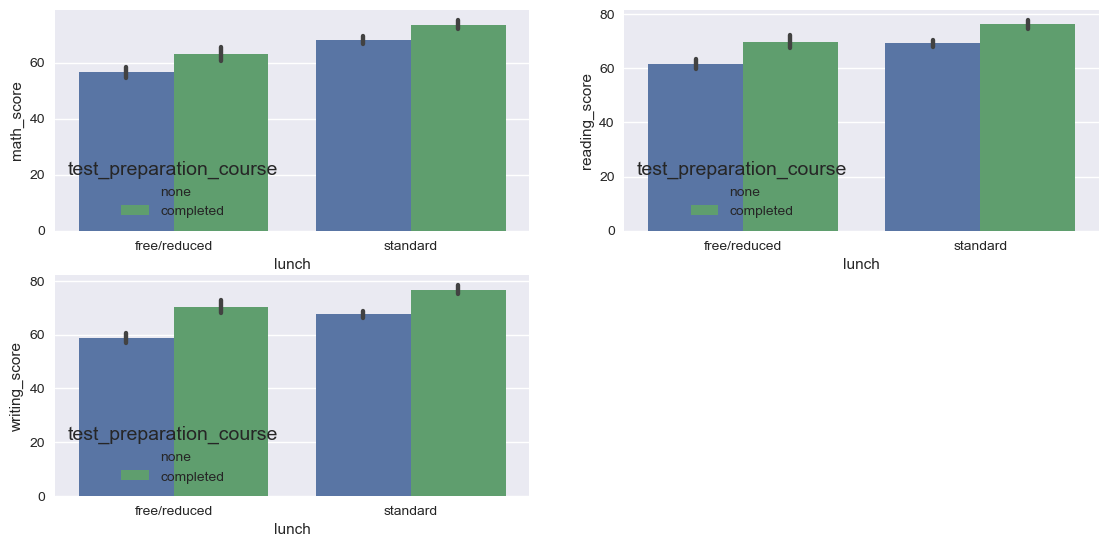

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])


Checking Outliers

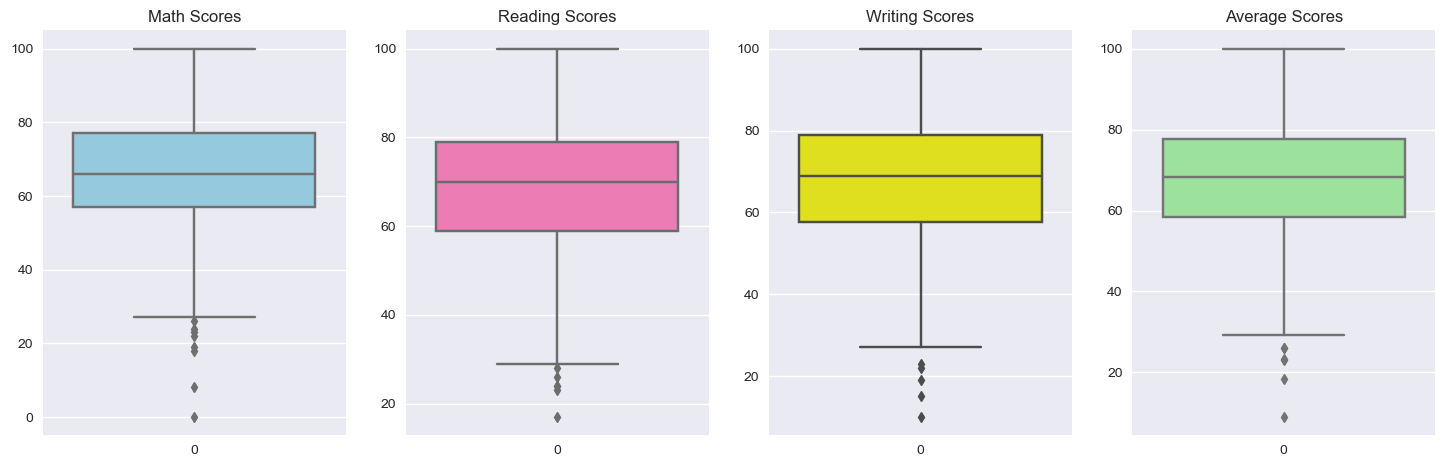

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.title('Math Scores')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.title('Reading Scores')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.title('Writing Scores')
plt.subplot(144)
plt.title('Average Scores')
sns.boxplot(df['average'],color='lightgreen')
plt.show()

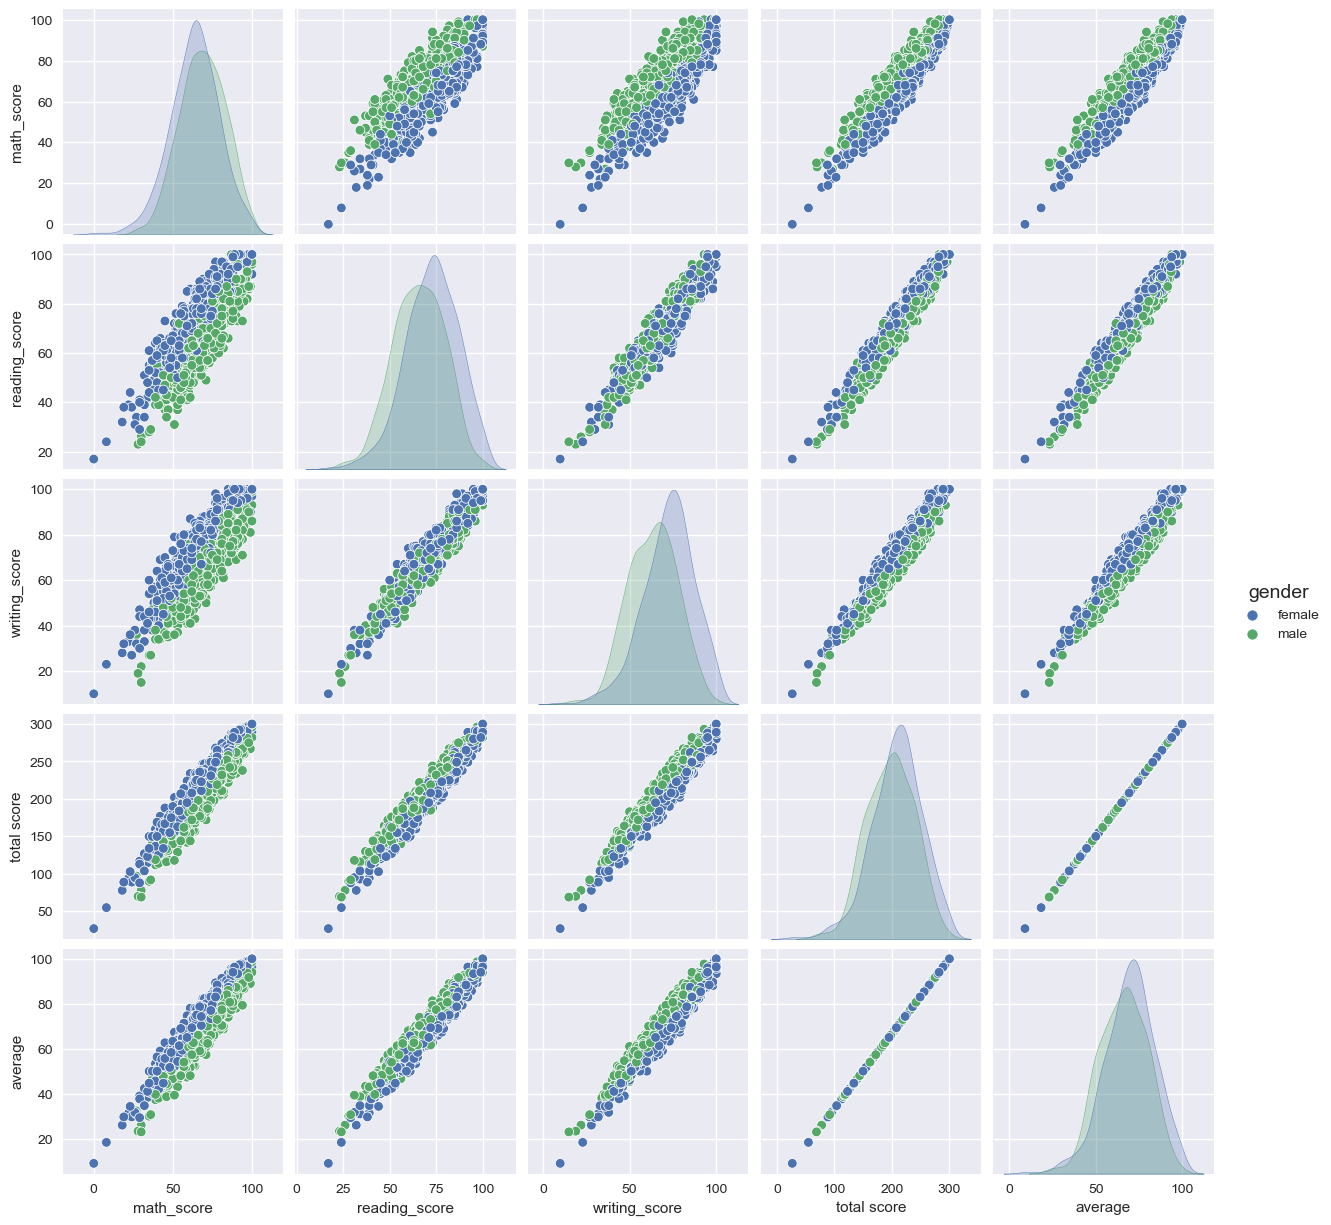

In [ ]:
#MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()



From the above plot it is clear that all the scores increase linearly with each other.